## Learning to rank
with scikit-learn: the pairwise transform

[website](http://fa.bianp.net/blog/2012/learning-to-rank-with-scikit-learn-the-pairwise-transform/)

### background
ランク設定では, トレーニングデータはある程度順序付けられたアイテムの集合が利用される.
その順序は`数値`, `基数`, `バイナリ("relevant", "not relevant")`が利用される. 
そのため, リストに含まれるいかなる2つのサンプル`a`, `b`において, `a > b`, `b < a`は比較できないものとして扱われる.

たとえば, 検索エンジンの場合, 異なるクエリに属する結果からデータセットは構成され, クエリとの関連性のみを比較したい.

この順序関係はたいてい`domain-specific`(領域特化)である. たとえば, 情報検索においては比較可能なサンプル集合は"query id"と呼ばれる. この問題でのゴールは同一のクエリに属するドキュメントたちのみを比較することである.

In [11]:
%matplotlib inline
import itertools
import numpy as np
from scipy import stats
import pylab as pl
from sklearn import svm, linear_model, cross_validation

始めるにあたって, 応答変数が3つのグレード$Y = \{0, 1, 2\}$から成り立ち, 説明変数がそれぞれ2次元の特徴を持つ30のサンプルを作成する.

(IRにおけるクエリといった)比較可能な要素の集合は, $X_{1}, X_{2}$といった正規分布に従うが違いにパラメータの異なる部分集合の集合和から成り立つ. 次に出力する表では, $X_{1}$は丸のマーカーで, $X_{2}$は三角のマーカーで示す.

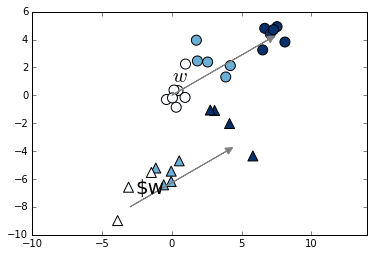

In [12]:
np.random.seed(0)
theta = np.deg2rad(60) # 角度をラジアンに変換する
w = np.array([np.sin(theta), np.cos(theta)])
K = 20
X = np.random.randn(K, 2)
y = [0] * K # len = 20 の０で埋められたリストを作成
for i in range(1,3):
    X = np.concatenate((X, np.random.randn(K, 2) + i * 4 * w))
    y = np.concatenate((y, [i] * K))
# slightly displace data corresponding to our second partition
X[::2] -= np.array([3,7])
blocks = np.array([0,1] * int((X.shape[0] / 2)))
# split into train and test set
cv = cross_validation.StratifiedShuffleSplit(y, test_size=0.5)
train, test = next(iter(cv))
X_train, y_train, b_train = X[train], y[train], blocks[train]
X_test, y_test, b_test = X[test], y[test], blocks[test]
# plot the result
idx = (b_train == 0)
pl.scatter(X_train[idx, 0], X_train[idx, 1], c=y_train[idx],
           marker="^", cmap=pl.cm.Blues, s=100)
pl.scatter(X_train[~idx, 0], X_train[~idx, 1], c=y_train[~idx],
          marker="o", cmap=pl.cm.Blues, s=100)
pl.arrow(0,0,8 * w[0], 8*w[1], fc="gray", ec="gray",
        head_width=0.5, head_length=0.5)
pl.text(0,1, "$w$", fontsize=20)
pl.arrow(-3, -8, 8*w[0], 8*w[1], fc="gray", ec="gray",
        head_width=0.5, head_length=0.5)
pl.text(-2.6, -7, "$w", fontsize=20)
pl.axis("equal")
pl.show()

上の表では,  $X_{1}, X_{2}$ともに共通する, 正しい順序を導出するような$w$ベクトルが存在することがわかる.